In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
dataset = load_breast_cancer()

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
x_train,x_test,y_train,y_test = tts(dataset.data , dataset.target , test_size = 0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler # for data normalization

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
n,d = x_train.shape

In [ ]:
model = tf.keras.models.Sequential([(tf.keras.layers.Input(shape = (d,))),
                                    (tf.keras.layers.Dense(1,activation = 'sigmoid'))])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x79fec2965480>>

In [ ]:
history = model.fit(x_train,y_train , validation_data = (x_test,y_test), epochs = 100)

Epoch 1/100
14/14 [==============================] - 0s 30ms/step - loss: 0.0977 - accuracy: 0.9812 - val_loss: 0.1035 - val_accuracy: 0.9580
Epoch 2/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0973 - accuracy: 0.9812 - val_loss: 0.1030 - val_accuracy: 0.9580
Epoch 3/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0967 - accuracy: 0.9812 - val_loss: 0.1026 - val_accuracy: 0.9580
Epoch 4/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0962 - accuracy: 0.9812 - val_loss: 0.1022 - val_accuracy: 0.9580
Epoch 5/100
14/14 [==============================] - 0s 10ms/step - loss: 0.0958 - accuracy: 0.9812 - val_loss: 0.1017 - val_accuracy: 0.9580
Epoch 6/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0953 - accuracy: 0.9812 - val_loss: 0.1014 - val_accuracy: 0.9580
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0949 - accuracy: 0.9812 - val_loss: 0.1009 - val_accuracy: 0.9580
Epoch 8

In [ ]:
x = model.evaluate(x_train,y_train)
print('accuracy on TRAIN DATA = ', x[1])
x = model.evaluate(x_test,y_test)
print('accuracy on TEST DATA = ',x[1])

14/14 [==============================] - 0s 3ms/step - loss: 0.0698 - accuracy: 0.9883
accuracy on TRAIN DATA =  0.9882628917694092
5/5 [==============================] - 0s 5ms/step - loss: 0.0818 - accuracy: 0.9720
accuracy on TEST DATA =  0.9720279574394226


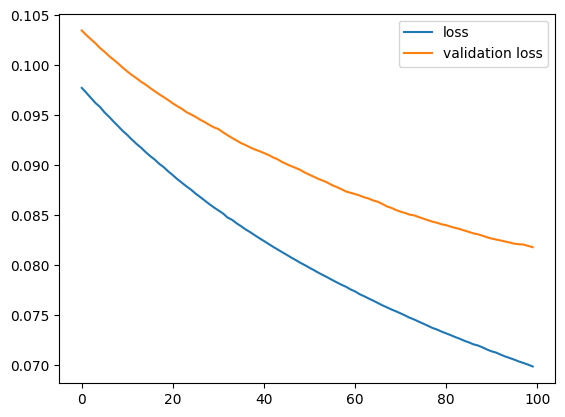

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label = "loss")
plt.plot(history.history['val_loss'],label = "validation loss")
plt.legend()

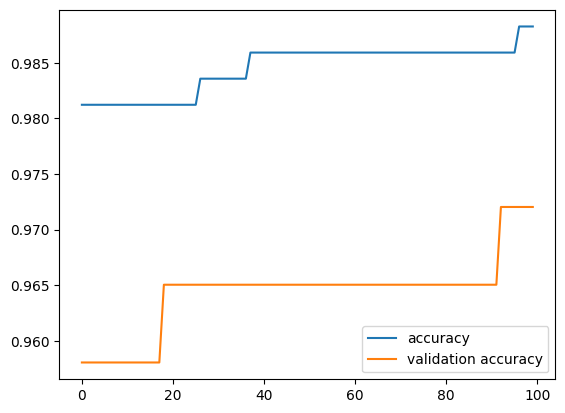

In [ ]:
plt.plot(history.history['accuracy'],label = "accuracy")
plt.plot(history.history['val_accuracy'],label = "validation accuracy")
plt.legend()